<a href="https://colab.research.google.com/github/borson-sakib/Hate-Comment-Detection/blob/main/SentimentPsychology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import string
import string
from wordcloud import WordCloud
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving HatePost.csv to HatePost.csv


In [ ]:
import pandas as pd 
df = pd.read_csv('HatePost.csv')

In [ ]:
df

,Serial,Hateposts
0,1,any wn in the the lancaster leominster clinton...
1,2,i m im 8th grade and im 14
2,3,i ve told my friends and all of them agree wit...
3,4,i guess i was lucky because all my friends wer...
4,5,normal hair is no fun braveheart nature intend...
...,...,...
5994,5995,i was also wondering if any of you all believe...
5995,5996,it s really not our faith of choice that matte...
5996,5997,seriously this guy is very primitive even for ...
5997,5998,i d put him somewhere between the typical afri...


In [ ]:
def cleanTxt(df):
    df = re.sub(r'@[A-Za-z0-9]+', '', df) #Removing mentions
    df = re.sub(r'#[A-Za-z0-9]+', '', df)  #Removing hastags
    df = re.sub(r'RT[\s]+', '', df)   #Removing RTs
    df = re.sub(r'https?:\/\/\S+', '', df) #Removing URLs (generally promotional posts)
    return df
    df['text'] = df['Hateposts'].apply(cleanTxt)
    df

In [ ]:
from textblob import TextBlob
#Function for getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function for getting polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#Creating new columns
df['Subjectivity'] = df['Hateposts'].apply(getSubjectivity)
df['Polarity'] = df['Hateposts'].apply(getPolarity)
df

,Serial,Hateposts,Subjectivity,Polarity
0,1,any wn in the the lancaster leominster clinton...,0.000000,0.000000
1,2,i m im 8th grade and im 14,0.000000,0.000000
2,3,i ve told my friends and all of them agree wit...,0.650000,-0.050000
3,4,i guess i was lucky because all my friends wer...,0.319444,0.111111
4,5,normal hair is no fun braveheart nature intend...,0.320000,0.030000
...,...,...,...,...
5994,5995,i was also wondering if any of you all believe...,0.900000,0.700000
5995,5996,it s really not our faith of choice that matte...,0.200000,-0.100000
5996,5997,seriously this guy is very primitive even for ...,0.466667,-0.100000
5997,5998,i d put him somewhere between the typical afri...,0.250000,-0.083333


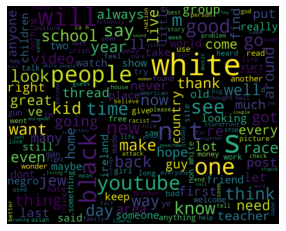

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Hateposts']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Sentiment analysis
def getAnalysis(score):
  if score < 0:
    return '-1'
  elif score == 0:
    return '0'
  else:
    return '1'
df['Class'] = df['Polarity'].apply(getAnalysis)

df

,Serial,Hateposts,Subjectivity,Polarity,Class
0,1,any wn in the the lancaster leominster clinton...,0.000000,0.000000,0
1,2,i m im 8th grade and im 14,0.000000,0.000000,0
2,3,i ve told my friends and all of them agree wit...,0.650000,-0.050000,-1
3,4,i guess i was lucky because all my friends wer...,0.319444,0.111111,1
4,5,normal hair is no fun braveheart nature intend...,0.320000,0.030000,1
...,...,...,...,...,...
5994,5995,i was also wondering if any of you all believe...,0.900000,0.700000,1
5995,5996,it s really not our faith of choice that matte...,0.200000,-0.100000,-1
5996,5997,seriously this guy is very primitive even for ...,0.466667,-0.100000,-1
5997,5998,i d put him somewhere between the typical afri...,0.250000,-0.083333,-1


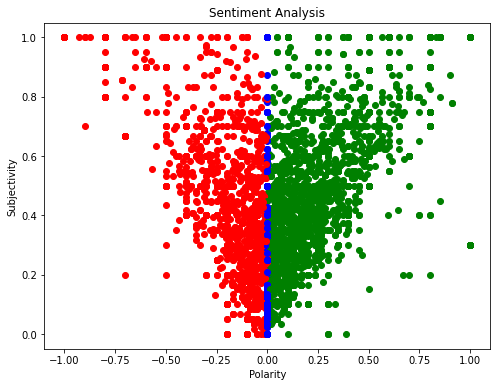

In [ ]:
# Scatter-Plot the polarity and subjectivity in graph
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if df['Class'][i] == '0':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  elif df['Class'][i] == '1':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
  else:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Class == '1']
ptweets = ptweets['Hateposts']
round((ptweets.shape[0]/df.shape[0]*100), 1)

38.6

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Class == '-1']
ntweets = ntweets['Hateposts']
round((ntweets.shape[0]/df.shape[0]*100), 1)

22.4

In [ ]:
# Get the percentage of neutral tweets
nttweets = df[df.Class == '0']
nttweets = nttweets['Hateposts']
round((nttweets.shape[0]/df.shape[0]*100), 1)

39.0

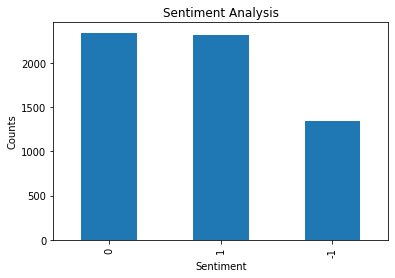

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 197 kB 7.9 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=cc84e4615750e3e73846f67b1f7652ceac17422b31735d1be45e054e6c2ab7f7
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.2 MB/s 


In [ ]:
import neattext.functions as nfx
# dir(nfx)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_punctuations)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_emojis)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_hashtags)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_urls)

In [ ]:
df['Clean_Text'] = df['Hateposts'].apply(nfx.remove_special_characters)

In [ ]:
clean_text=df ['Clean_Text']
clean = pd.DataFrame(clean_text)
clean

,Clean_Text
0,any wn in the the lancaster leominster clinton...
1,i m im 8th grade and im 14
2,i ve told my friends and all of them agree wit...
3,i guess i was lucky because all my friends wer...
4,normal hair is no fun braveheart nature intend...
...,...
5994,i was also wondering if any of you all believe...
5995,it s really not our faith of choice that matte...
5996,seriously this guy is very primitive even for ...
5997,i d put him somewhere between the typical afri...


In [ ]:
clean.to_csv('k.csv')

In [ ]:
from csv import reader
with open('k.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)

    print(csv_reader)
    # Iterate over each row in the csv using reader object
    # for row in csv_reader:
    #     te.get_emotion(row)

In [ ]:
onlyText=pd.read_csv('k.csv')

In [ ]:
#@title
onlyText['Clean_Text']
p=onlyText['Clean_Text']
# print(p)
# print(type(p))

for row in p:
  text=str(row)
  # print(text)
  temp = te.get_emotion(text) 
  # #print(type(temp))
  print(pd.DataFrame([temp]))

AttributeError: ignored

In [ ]:

onlyText['Clean_Text']
p=onlyText['Clean_Text']
#print(p)
# p.type()
text1 = []
for row in p:
  text=str(row)
  #print(text)
  temp=(te.get_emotion(text))
  temp.update({"text":text})
  t = pd.DataFrame([temp])
  text1.append(temp)
#print(text1)
df = pd.DataFrame(text1)
print(df)
df.to_csv('mydf.csv')
#text1.to_csv('mydf.csv')
 
  #t = pd.DataFrame([temp])
  #t['text'] = text
  #text1.append(t)
  #t.append(['text'])
#print(text1)
#df= pd.DataFrame([text1])

  #print(t)